선형 회귀(Linear Regression) [Reference](https://wikidocs.net/111472)

### 자동 미분

In [1]:
import tensorflow as tf

In [2]:
w = tf.Variable(2.)

def f(w):
  y = w**2
  z = 2*y + 5
  return z

In [3]:
with tf.GradientTape() as tape:
  z = f(w)

gradients = tape.gradient(z, [w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


### 자동 미분을 이용한 선형 회귀 구현

In [4]:
# 학습될 가중치 변수를 선언
w = tf.Variable(4.0)
b = tf.Variable(1.0)

In [5]:
@tf.function
def hypothesis(x):
  return w*x + b

In [6]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


In [7]:
@tf.function
def mse_loss(y_pred, y):
  # 두 개의 차이값을 제곱을 해서 평균을 취한다.
  return tf.reduce_mean(tf.square(y_pred - y))

In [8]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

In [9]:
optimizer = tf.optimizers.SGD(0.01)

In [10]:
for i in range(301):
  with tf.GradientTape() as tape:
    # 현재 파라미터에 기반한 입력 x에 대한 예측값을 y_pred
    y_pred = hypothesis(x)

    # 평균 제곱 오차를 계산
    cost = mse_loss(y_pred, y)

  # 손실 함수에 대한 파라미터의 미분값 계산
  gradients = tape.gradient(cost, [w, b])

  # 파라미터 업데이트
  optimizer.apply_gradients(zip(gradients, [w, b]))

  if i % 10 == 0:
    print("epoch : {:3} | w의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, w.numpy(), b.numpy(), cost))

epoch :   0 | w의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
epoch :  10 | w의 값 : 10.4971 | b의 값 : 1.977 | cost : 1.351182
epoch :  20 | w의 값 : 10.5047 | b의 값 :  1.93 | cost : 1.328165
epoch :  30 | w의 값 : 10.5119 | b의 값 : 1.884 | cost : 1.306967
epoch :  40 | w의 값 : 10.5188 | b의 값 : 1.841 | cost : 1.287436
epoch :  50 | w의 값 : 10.5254 | b의 값 : 1.799 | cost : 1.269459
epoch :  60 | w의 값 : 10.5318 | b의 값 : 1.759 | cost : 1.252898
epoch :  70 | w의 값 : 10.5379 | b의 값 : 1.721 | cost : 1.237644
epoch :  80 | w의 값 : 10.5438 | b의 값 : 1.684 | cost : 1.223598
epoch :  90 | w의 값 : 10.5494 | b의 값 : 1.648 | cost : 1.210658
epoch : 100 | w의 값 : 10.5548 | b의 값 : 1.614 | cost : 1.198740
epoch : 110 | w의 값 : 10.5600 | b의 값 : 1.582 | cost : 1.187767
epoch : 120 | w의 값 : 10.5650 | b의 값 :  1.55 | cost : 1.177665
epoch : 130 | w의 값 : 10.5697 | b의 값 :  1.52 | cost : 1.168354
epoch : 140 | w의 값 : 10.5743 | b의 값 : 1.492 | cost : 1.159782
epoch : 150 | w의 값 : 10.5787 | b의 값 : 1.464 | cost : 1.151890
epoch 

In [11]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.35479  54.295143 59.608593 64.92204 ]


### 케라스로 구현하는 선형 회귀

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

model = Sequential()

# 출력 y의 차원은 1. 입력 x의 차원(input_dim)은 1
# 선형 회귀이므로 activation은 'linear'
model.add(Dense(1, input_dim=1, activation='linear'))

# sgd는 경사 하강법을 의미. 학습률(learning rate, lr)은 0.01.
sgd = optimizers.SGD(lr=0.01)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

# 주어진 x와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.
model.fit(x, y, epochs=300)

C:\Users\HyunSeo\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/300
1/1 [==============================] - 0s 305ms/step - loss: 2965.9578 - mse: 2965.9578
Epoch 2/300
1/1 [==============================] - 0s 3ms/step - loss: 365.9567 - mse: 365.9567
Epoch 3/300
1/1 [==============================] - 0s 3ms/step - loss: 46.0451 - mse: 46.0451
Epoch 4/300
1/1 [==============================] - 0s 3ms/step - loss: 6.6818 - mse: 6.6818
Epoch 5/300
1/1 [==============================] - 0s 2ms/step - loss: 1.8377 - mse: 1.8377
Epoch 6/300
1/1 [==============================] - 0s 5ms/step - loss: 1.2409 - mse: 1.2409
Epoch 7/300
1/1 [==============================] - 0s 3ms/step - loss: 1.1668 - mse: 1.1668
Epoch 8/300
1/1 [==============================] - 0s 3ms/step - loss: 1.1570 - mse: 1.1570
Epoch 9/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1551 - mse: 1.1551
Epoch 10/300
1/1 [==============================] - 0s 3ms/step - loss: 1.1542 - mse: 1.1542
Epoch 11/300
1/1 [==============================] - 0s 3ms/step -

1/1 [==============================] - 0s 5ms/step - loss: 1.1091 - mse: 1.1091
Epoch 90/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1087 - mse: 1.1087
Epoch 91/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1083 - mse: 1.1083
Epoch 92/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1079 - mse: 1.1079
Epoch 93/300
1/1 [==============================] - 0s 3ms/step - loss: 1.1075 - mse: 1.1075
Epoch 94/300
1/1 [==============================] - 0s 3ms/step - loss: 1.1071 - mse: 1.1071
Epoch 95/300
1/1 [==============================] - 0s 3ms/step - loss: 1.1067 - mse: 1.1067
Epoch 96/300
1/1 [==============================] - 0s 2ms/step - loss: 1.1063 - mse: 1.1063
Epoch 97/300
1/1 [==============================] - 0s 2ms/step - loss: 1.1060 - mse: 1.1060
Epoch 98/300
1/1 [==============================] - 0s 3ms/step - loss: 1.1056 - mse: 1.1056
Epoch 99/300
1/1 [==============================] - 0s 3ms/step - loss: 1.1052 - ms

1/1 [==============================] - 0s 4ms/step - loss: 1.0716 - mse: 1.0716
Epoch 264/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0715 - mse: 1.0715
Epoch 265/300
1/1 [==============================] - 0s 3ms/step - loss: 1.0714 - mse: 1.0714
Epoch 266/300
1/1 [==============================] - 0s 3ms/step - loss: 1.0713 - mse: 1.0713
Epoch 267/300
1/1 [==============================] - 0s 2ms/step - loss: 1.0712 - mse: 1.0712
Epoch 268/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0712 - mse: 1.0712
Epoch 269/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0711 - mse: 1.0711
Epoch 270/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0710 - mse: 1.0710
Epoch 271/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0709 - mse: 1.0709
Epoch 272/300
1/1 [==============================] - 0s 3ms/step - loss: 1.0708 - mse: 1.0708
Epoch 273/300
1/1 [==============================] - 0s 2ms/step - loss: 1

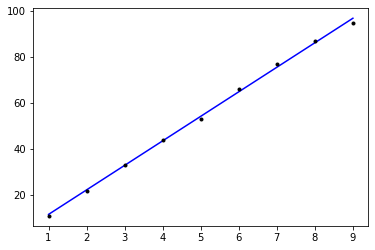

In [13]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')

In [14]:
print(model.predict([9.5]))

[[102.19424]]
